In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.utils import shuffle

### Reuters 52 Labels

In [2]:
r52_filepath = os.path.abspath('C:/Users/franc/OneDrive/Documentos/Projects/r52/tclass/Data/train/reuters_train_52/r52-train-all-terms.txt')

In [3]:
r52=pd.read_csv(r52_filepath, sep= '\t', header=None, )

In [4]:
r52.head()

,0,1
0,cocoa,bahia cocoa review showers continued throughou...
1,earn,champion products ch approves stock split cham...
2,acq,computer terminal systems cpml completes sale ...
3,earn,cobanco inc cbco year net shr cts vs dlrs net ...
4,earn,am international inc am nd qtr jan oper shr lo...


In [5]:
###############################################################################################################################

##### R52 Categories

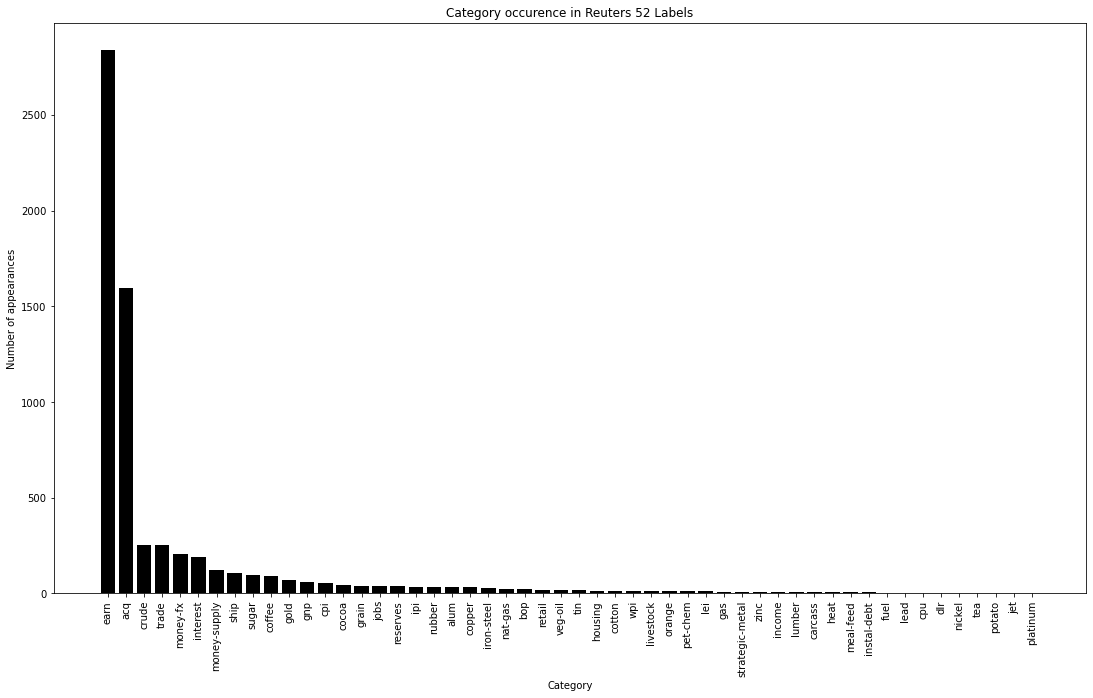

<Figure size 432x288 with 0 Axes>

In [6]:
#### defining the desired column as a variable
categories_r52=r52[0]
#create a dict with number of occurences
occurence_r52=categories_r52.value_counts().to_dict()
plt.bar(occurence_r52.keys(), occurence_r52.values(), color='black')
plt.title('Category occurence in Reuters 52 Labels')
plt.xlabel('Category')
plt.ylabel('Number of appearances')
plt.xticks(rotation=90)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()
plt.savefig('C:/Users/franc/OneDrive/Documentos/Projects/r52/tclass/Data/occurence_plot.eps', format='eps')

In [7]:
################################################################################################################################

### Adding some features

##### Reuters 52 New Columns

In [8]:
r52.rename(columns={0: 'category', 1: 'text'}, inplace=True)
r52['words_num']= r52['text'].str.split().str.len()
r52['len_tot']= r52['text'].str.len()
r52['words_len_med'] = r52['text'].str.len()/r52['words_num']
r52['words_num_norm'] = (r52['words_num'] - r52['words_num'].min())/(r52['words_num'].max()-r52['words_num'].min())
r52['words_len_med_norm'] = (r52['words_len_med'] - r52['words_len_med'].min())/(r52['words_len_med'].max()-r52['words_len_med'].min())
r52['words_num_norm'] = (r52['words_num'] - r52['words_num'].min())/(r52['words_num'].max()-r52['words_num'].min())
r52['words_len_med_norm'] = (r52['words_len_med'] - r52['words_len_med'].min())/(r52['words_len_med'].max()-r52['words_len_med'].min())

In [9]:
r52.head()

,category,text,words_num,len_tot,words_len_med,words_num_norm,words_len_med_norm
0,cocoa,bahia cocoa review showers continued throughou...,456,2519,5.524123,0.436170,0.381910
1,earn,champion products ch approves stock split cham...,62,361,5.822581,0.055126,0.438223
2,acq,computer terminal systems cpml completes sale ...,210,1246,5.933333,0.198259,0.459119
3,earn,cobanco inc cbco year net shr cts vs dlrs net ...,44,221,5.022727,0.037718,0.287307
4,earn,am international inc am nd qtr jan oper shr lo...,93,465,5.000000,0.085106,0.283019


### Visual Guide

##### EN5BBC Box Plot

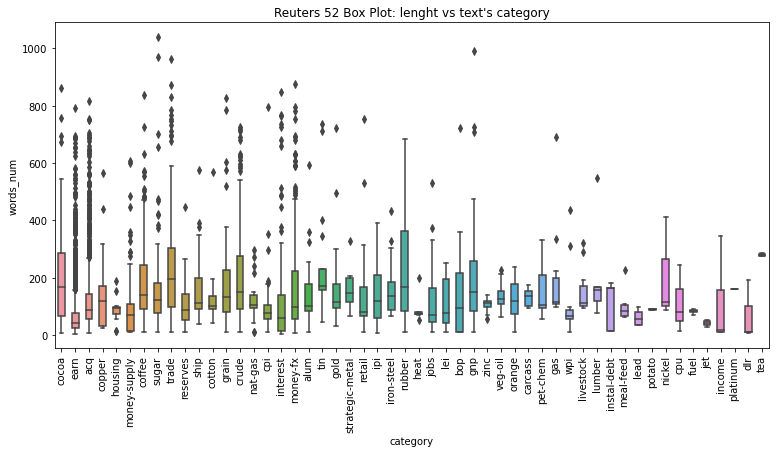

In [15]:
plt.figure(figsize=(12.8,6))
plt.title("Reuters 52 Box Plot: lenght vs text's category")
plt.xticks(rotation=90)
sns.boxplot(data=r52, x='category', y='words_num', width=.5)
plt.savefig('C:/Users/franc/OneDrive/Documentos/Projects/r52/tclass/Data/visual.eps', format='eps')

##### News length distribution for Reuters 52

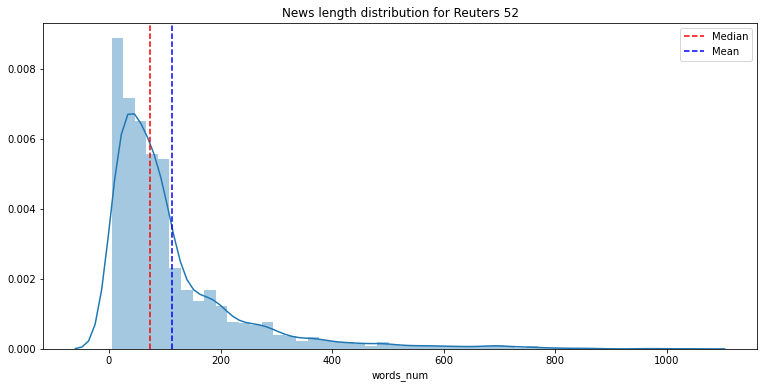

In [11]:
plt.figure(figsize=(12.8,6))
sns.distplot(r52['words_num']).set_title('News length distribution for Reuters 52');
median=plt.axvline(np.median(r52['words_num']),color='r', linestyle='--')
mean=plt.axvline(np.mean(r52['words_num']),color='b', linestyle='--')
plt.legend({'Median':median, 'Mean':mean})

In [12]:
################################################################################################################################

In [13]:
def random_item_list(label):
    r52_raw=pd.read_csv(r52_filepath, sep= '\t', header=None)
    r52_raw.rename(columns={0: 'category', 1: 'text'}, inplace=True)
    r52_raw = shuffle(r52_raw)
    r52_raw.reset_index(inplace=True, drop=True) 
    #r52_raw.sample(frac=1).reset_index(drop=True)
    labeled_r52 = r52_raw.loc[r52_raw['category'] == label]
    return labeled_r52

In [14]:
random_item_list('earn')

,category,text
0,earn,philip crosby associates pca earnings delayed ...
3,earn,hubco inc hco st qtr net shr cts vs cts net vs...
5,earn,lennar len sees strong earnings for year lenna...
7,earn,e systems esy sets qtrly payout qtrly div cts ...
9,earn,mcrae industries inc mri b nd qtr jan net shr ...
...,...,...
6525,earn,four seasons hotels inc year net oper shr cts ...
6527,earn,united healthcare corp unih th qtr net shr cts...
6528,earn,kleinert s inc klrt st qtr ends feb net shr ct...
6529,earn,morgan grenfell says profits hit by guinness m...
